In [265]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rc('font', **{
'family': 'DejaVu Sans',
'weight': 'normal'
})


In [9]:
def bol(e, beta):
    return np.exp(-e*beta)

In [10]:
enantio = "R" # "S"
ab = "a5" # "a5"
residue = "33l" # "33l"

In [11]:
beta = 1 / 2.5
hills_pace = 250

In [12]:
with open("/home/domain/data/kirill/AB/XOP/md/"+ab+"/" + enantio + "/HILLS") as f:
    for i, l in enumerate(f):
            pass
total_states = (i + 1) * hills_pace
with open("/home/domain/data/kirill/AB/XOP/md/"+ ab + "/fes-" + ab + enantio + "-y" + residue + ".dat") as f:
    lines = f.readlines()

In [13]:
z_x = []
z_total = []

for line in lines:
    l = [float(c) for c in line.split()]
    if len(l) < 3 or l[2] == np.inf:
        continue
    if l[0] > 0.7 and \
       l[0] < 1 and \
       l[1] > 2.44:
        z_x.append(bol(l[2],beta))
    z_total.append(bol(l[2],beta))
N = sum(z_x) / sum(z_total) * total_states

In [332]:
print sum(z_x), sum(z_total), total_states

36.7654807439 4761.00722883 181330500


In [333]:
print int(round(N))

1400272


# CALCLUTAE R/S CONVERGENCE

In [215]:
import os
import numpy as np

In [588]:
def bol(e, beta):
    return np.exp(-e*beta)
def productive(distance,angle):
    if distance < 1.0 and distance > 0.8 and angle > 2.44:
        return True
    return False

beta = 1 / 2.5
hills_pace = 250
with open(dr+"HILLS") as f:
    for i, l in enumerate(f):
            pass
total_states = (i + 1) * hills_pace

# for a5 or a17

In [720]:
Ns = []
drr = "fes_convergence"
dr = '/home/domain/data/kirill/AB/XOP/md/a17/R/'
fcol = 2
files = [f for f in os.listdir(dr+drr) if "fes_rew" in f and not "png" in f]
z_totalsR = []
z_xR = []
for fl in range(len(files)):
    try:
        with open(dr+drr+'/fes_rew' + str(fl) + ".dat") as f:
            lines = f.readlines()
    except IOError as e:
        print fl
        print "error " + e.strerror
    z_x = []
    z_total = []
    for line in lines:
        l = [float(c) for c in line.split()]
        
        if len(l) < 3 or e == l[fcol]:
            continue
        e = l[fcol]
        if productive(*l[:2]):
            z_x.append(bol(e,beta))
        z_total.append(bol(e,beta))
        if max_e < l[2]: max_e = e
    N = sum(z_x) / sum(z_total)# * total_states * i/ 75
    z_xR.append(sum(z_x))
    z_totalsR.append(sum(z_total))
    Ns.append(N)
NsR = Ns

Ns = []
dr = '/home/domain/data/kirill/AB/XOP/md/a17/S/'
files = [f for f in os.listdir(dr+drr) if "fes_rew" in f and not "png" in f]
z_totalsS = []
z_xS = []
for fl in range(len(files)):
    with open(dr+drr+'/fes_rew' + str(fl) + ".dat") as f:
        lines = f.readlines()      
    z_x = []
    z_total = []
    for line in lines:
        l = [float(c) for c in line.split()]
        if len(l) < 3 or e == l[fcol]:
            continue
        e = l[fcol]
        if productive(*l[:2]):
            z_x.append(bol(e,beta))
        z_total.append(bol(e,beta))
    N = sum(z_x) / sum(z_total)# * total_states * i/ 75
    z_xS.append(sum(z_x))
    z_totalsS.append(sum(z_total))
    Ns.append(N)
NsS = Ns

# cut the results to equal length
length = min(len(NsS),len(NsR))
NsR = [1]+NsR[:length]
NsS = [1]+NsS[:length]

# Kd calculation

In [716]:
e0 = 43.50594662 # difference in minima of 1d fes
r = 0.15 # cylinder radius in A
lc = 1.5 - 1.0 # cylinder length - wall
fcol = 2
Scyl = np.pi * r**2 
with open('/home/domain/data/kirill/AB/XOP/md/a5/S/fes_convergence/fes_rew70.dat') as f:
    lines = f.readlines()      
bound_productive = []
bound_unproductive = []
unbound = []
for line in lines:
    l = [float(c) for c in line.split()]
    if len(l) < 3: #or e == l[fcol]:
        continue
    e = l[fcol]
    
    if productive(*l[:fcol]):
        bound_productive.append(bol(e-e0,beta))
    #    print "productive " + str(e)
    elif not productive(*l[:fcol]) and l[0] < 2:
        pass
        bound_unproductive.append(bol(e,beta))
     #   print "unproductive " + str(e)
    elif l[0] >= 2 and e < 120:
        pass
        unbound.append(e)
     #   print "unbound " + str(e)
N = sum(z_x) / sum(z_total)# * total_states * i/ 75

#Kd = sum(unbound) / ((sum(bound_productive) + sum(bound_unproductive))*Scyl) # in units of [molecule/A^3]
Kd = 1 / sum(bound_productive) / Scyl

Kd = Kd * 1e27 / (6.02e23) # (molecule / A^3) * (A^3 / mol)
print "Kd = " + str(round(Kd*1e6,2)) + " uM"

Kd = 82.98 uM


In [687]:
dG = - 8.31 * 300 * np.log(Kd)
print dG

2731.03049049


In [656]:
Kd #* 1e6 # uM

160791838.49679917

In [637]:
-1/beta * np.log(Kd/ 1e6)

50.525025661782088

In [644]:
bol(54,beta)*1e6

0.00041613973942241489

# for other ABs

In [650]:
Ns = []
drr = "fes_convergence"
dr = '/home/domain/data/kirill/AB/XOP/md/mutant_cone/2_73_val/'
fcol = 2
files = [f for f in os.listdir(dr+drr+"R") if "fes_rew" in f and not "png" in f]
z_totalsR = []
z_xR = []
for fl in range(len(files)):
    try:
        with open(dr+drr+"R"+'/fes_rew' + str(fl) + ".dat") as f:
            lines = f.readlines()
    except IOError as e:
        print fl
        print "error " + e.strerror
    z_x = []
    z_total = []
    for line in lines:
        l = [float(c) for c in line.split()]
        
        if len(l) < 3 or e == l[fcol]:
            continue
        e = l[fcol]
        if productive(*l[:2]):
            z_x.append(bol(e,beta))
        z_total.append(bol(e,beta))
        if max_e < l[2]: max_e = e
    N = sum(z_x) / sum(z_total)# * total_states * i/ 75
    z_xR.append(sum(z_x))
    z_totalsR.append(sum(z_total))
    Ns.append(N)
NsR = Ns

Ns = []
#dr = '/home/domain/data/kirill/AB/XOP/md/a17/S/'
files = [f for f in os.listdir(dr+drr+"S") if "fes_rew" in f and not "png" in f]
z_totalsS = []
z_xS = []
for fl in range(len(files)):
    with open(dr+drr+"S"+'/fes_rew' + str(fl) + ".dat") as f:
        lines = f.readlines()      
    z_x = []
    z_total = []
    for line in lines:
        l = [float(c) for c in line.split()]
        if len(l) < 3 or e == l[fcol]:
            continue
        e = l[fcol]
        if productive(*l[:2]):
            z_x.append(bol(e,beta))
        z_total.append(bol(e,beta))
    N = sum(z_x) / sum(z_total)# * total_states * i/ 75
    z_xS.append(sum(z_x))
    z_totalsS.append(sum(z_total))
    Ns.append(N)
NsS = Ns

# cut the results to equal length
length = min(len(NsS),len(NsR))
NsR = [1]+NsR[:length]
NsS = [1]+NsS[:length]

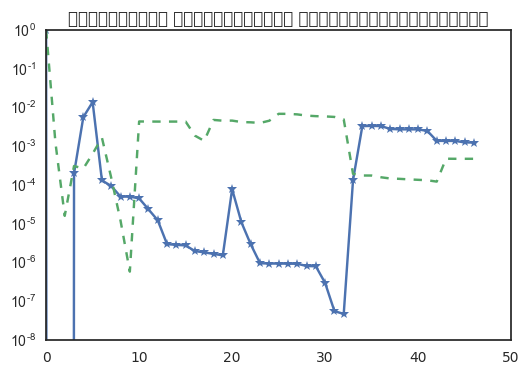

In [449]:
plt.plot(NsS,  '*-')
plt.plot(NsR,  '+--')
plt.title(u"Результаты предсказания стереоселективности")
plt.yscale("log")

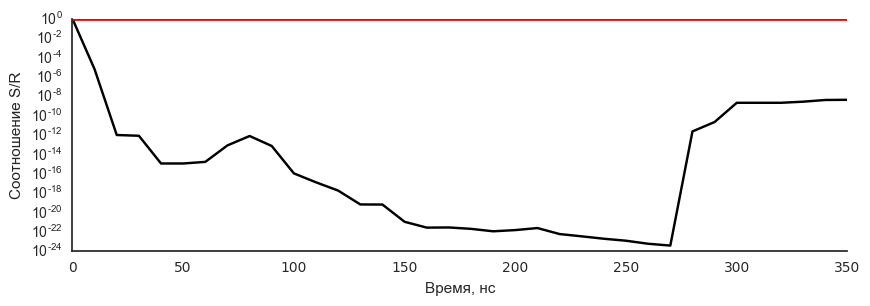

In [722]:
sns.despine()
sns.set_style("white")
fig,ax = plt.subplots(figsize=(10,3))

plt.plot(range(0,len(NsS)*10,10),[s/r for s,r in zip(NsS,NsR)],'k-');
plt.plot(range(0,len(NsS)*10,10),[1]*len(range(0,len(NsS)*10,10)),'r-', linewidth=2);
#plt.title(u"Оценка стереоселективности A5Bad", fontweight = "bold")
plt.xlim(0,350)
sns.despine()
#plt.ylim(1e-12,1e12)
plt.yscale("log")
plt.ylabel(u"Соотношение S/R")
plt.xlabel(u"Время, нс")
#plt.plot(zip(range(0,390,10),[1]*390))

In [451]:
[s/(r) for s,r in zip(NsS,NsR)][-1]

2.6247305112986092

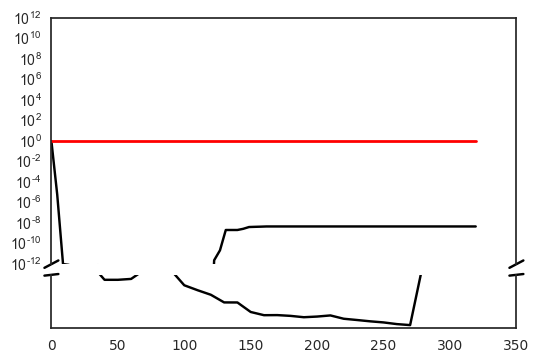

In [792]:


f, (ax, ax2,) = plt.subplots(2, 1, sharex=True)

plt.ylabel(u"Соотношение S/R")
plt.xlabel(u"Время, нс")
ax = plt.subplot2grid((5, 3), (0, 0), rowspan = 4, colspan = 3)
ax2 = plt.subplot2grid((5, 3), (4, 0), rowspan = 1, colspan = 3)
plt.xlim(0,350)
ax.set_yscale("log")
ax2.set_yscale("log")
# plot the same data on both axes
ax.plot(range(0,len(NsS)*10,10),[s/r for s,r in zip(NsS,NsR)],'k-');
ax.plot(range(0,len(NsS)*10,10),[1]*len(range(0,len(NsS)*10,10)),'r-', linewidth=2);
ax2.plot(range(0,len(NsS)*10,10),[s/r for s,r in zip(NsS,NsR)],'k-');

# zoom-in / limit the view to different portions of the data
ax.set_ylim(1e-12, 1e12)  # outliers only
ax2.set_ylim(1e-24, 1e-14)  # most of the data
ax2.set_yticklabels(np.arange(1e-24, 1e-14, ))
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax2.set_yticklabels([l for l in ax2.get_ymajorticklabels()[::2]])
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


In [788]:
ax2.set_yticklabels([l for l in ax2.get_ymajorticklabels()[::2]])